MaNGAID : 12-84660
Coordinates : $230.153021184	41.9604360155$  
Image : SDSS DR12  

In [12]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## 1. 星系颜色
### 1.1 看看图

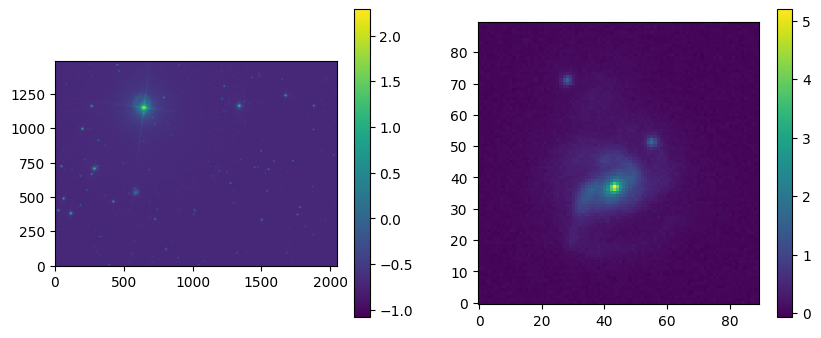

In [16]:
hdu = fits.open('/home/zqw/useful/dazuoye/frame-r-003964-3-0112.fits.bz2')[0]
data = hdu.data
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(np.log10(data+0.2),origin='lower')
plt.colorbar()

img = hdu.data[495:585,545:635]
plt.subplot(122)
plt.imshow(img,origin='lower')
plt.colorbar()

### 1.2 星系颜色u-r

Text(0.5, 1.0, 'NGC 2537 u-g')

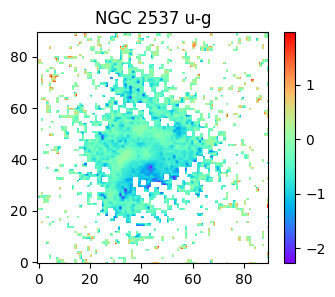

In [18]:
hdu_u = fits.open('/home/zqw/useful/dazuoye/frame-u-003964-3-0112.fits.bz2')[0]
img_u = hdu_u.data[495:585,545:635]
plt.figure(figsize=(4,3),dpi=100)
plt.imshow(np.log10(img_u/img),origin='lower',cmap='rainbow')
plt.colorbar()
plt.title('NGC 2537 u-g')

对星系的u波段-r波段，可以看到星系中有些区域的u-r值较大，有恒星形成活动较强的团块和旋臂结构

## 2. 星系形态

### 2.1

background= -0.0015169552


Text(0.5, 1.0, 'Subtract background value')

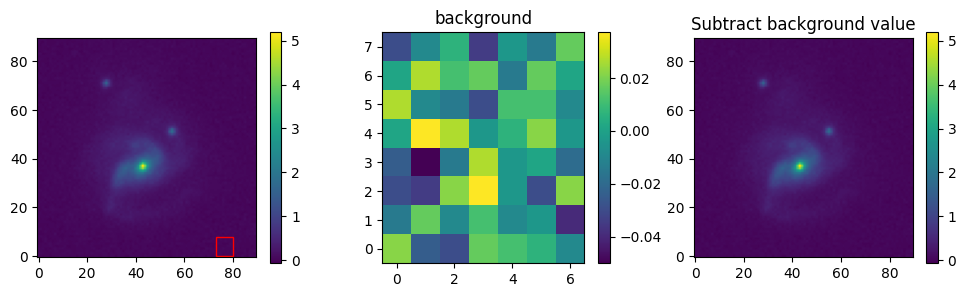

In [19]:
# 找一块看起来干净的区域计算背景值，即图红色框内
plt.figure(figsize=(12,3),dpi=100)
ax = plt.subplot(131)
plt.imshow(img,origin='lower')
plt.colorbar()
rect = plt.Rectangle((73,0),7,8,fill=False,edgecolor='red',linewidth=1)
ax.add_patch(rect)

# 红框内计算背景值
area = hdu.data[0:8,73:80]
bg = np.mean(area)  
print('background=',bg)
plt.subplot(132)
plt.imshow(area,origin='lower')
plt.colorbar()
plt.title('background')

# 将img减去背景值
img = img - bg
plt.subplot(133)
plt.imshow(img,origin='lower')
plt.colorbar()
plt.title('Subtract background value')

### 2.2 计算C

center: [43] [37]
r100= 30 ;  f100= 20.572440419346094
r90= 14 ;  f90= 18.91528034210205
r50= 3 ;  f50= 10.41080093383789
C= 4.666666666666667
晚型星系


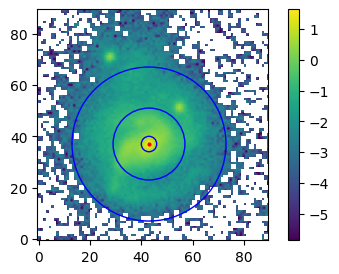

In [21]:
# 星系中心
center_y,center_x = np.where(img==np.max(img))
print('center:',center_x,center_y)

# 计算r90，r50
r100=30 # 定义r100
f100=[]
flux=0
x=np.linspace(0,img.shape[0],90)
y=np.linspace(0,img.shape[1],90)
for r in np.linspace(1,r100,30):
    pixel_x = np.where((x-center_y>(r-1)) & (x-center_y<r))
    pixel_y = np.where((y>center_x+r-1) & (y<center_x+r))
    flux+=np.mean(np.sum(img[pixel_x,pixel_y]))
    f100.append(flux)
print("r100=",r100,"; ","f100=",f100[-1])
for i,fi in enumerate(f100):
    f1=0.5
    f2=0.5
    if abs(fi-0.5*f100[-1])<f2:
        f50=fi
        r50=1+i
        f2=abs(fi-0.5*f100[-1])
    elif abs(fi-0.9*f100[-1])<f1:
        f90=fi
        r90=1+i
        f1=abs(fi-0.9*f100[-1])
    
print("r90=",r90,"; ","f90=",f90)
print("r50=",r50,"; ","f50=",f50)

# 计算C：C=r90/r50
# 利用C=2.86作为分类标准
C=r90/r50
print("C=",C)
if C>2.86:
    print("晚型星系")
else:
    print("早型星系")

# 画画图
plt.figure(figsize=(5,3),dpi=100)
plt.scatter(center_x,center_y,c='r',s=4)
plt.imshow(np.log(img), origin='lower')
plt.colorbar()
c100 = plt.Circle((center_x,center_y),r100,color='b',fill=False)
c90 = plt.Circle((center_x,center_y),r90,color='b',fill=False)
c50 = plt.Circle((center_x,center_y),r50,color='b',fill=False)
plt.gcf().gca().add_artist(c100)
plt.gcf().gca().add_artist(c90)
plt.gcf().gca().add_artist(c50)

## 3. 结构

### 3.1 发射线

In [ ]:
from marvin.tools import Maps
marvin.config.mode = 'local'
map = marvin.tools.Maps(filename ='/home/zqw/useful/dazuoye/manga-7443-9101-MAPS-SPX-MILESHC-MASTARSSP.fits.gz')

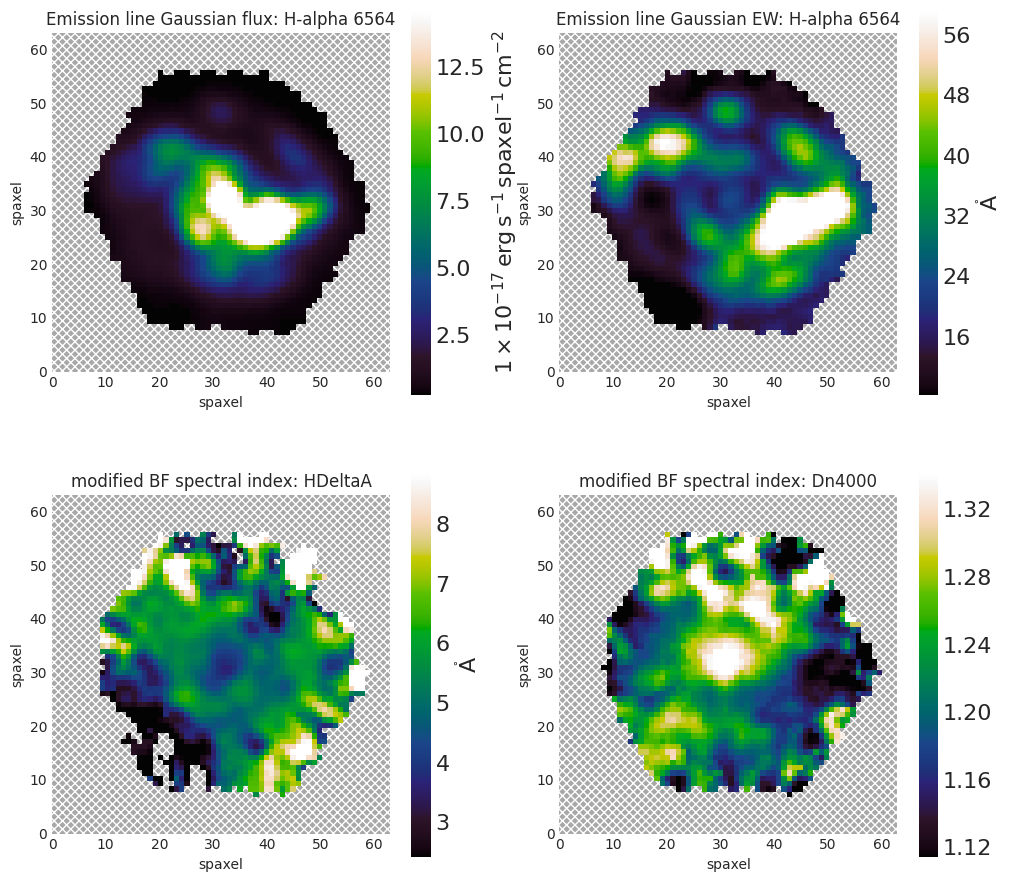

In [112]:
Dn4000=map.getMap('specindex_bf',channel='dn4000')
EW_Ha=map.getMap('emline_gew',channel='ha')
ha=map.getMap('emline_gflux',channel='ha')
Hdelta=map.getMap('specindex_bf',channel='HdeltaA')
with plt.style.context('seaborn-darkgrid'):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 11))
    ha.plot(fig=fig, ax=axes[0, 0])
    EW_Ha.plot(fig=fig, ax=axes[0, 1])
    Dn4000.plot(fig=fig, ax=axes[1, 1])
    Hdelta.plot(fig=fig, ax=axes[1, 0])

1. 该星系能看出有明显的旋臂结构,星系中心及旋臂上有很强的$H_\alpha$,说明有很丰富的大质量星和气体；
2. 旋臂上有几处Ha的等值宽度较大，是恒星形成活跃的区域；
3. 星系旋臂边上有几处有很强的$H_\delta$，这些区域在0.1-1Gyr内可能有星暴，使得4000埃break 较强的A型星占主导；
4. 在星系中心和旋臂上$H_\alpha$流量较小的区域，Dn4000的值较大，表明星系中心和旋臂部分区域在1-2Gyr内没有大量的恒星形成活动；

### 3.2 BPT图

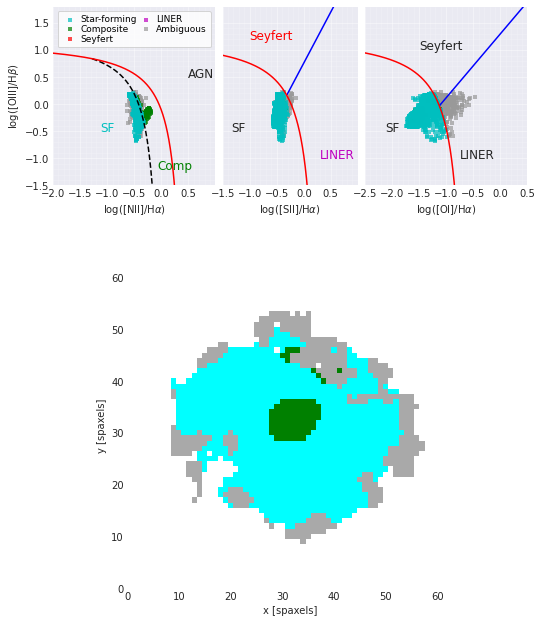

In [10]:
mask,fig,axes = map.get_bpt()

1. 星系中心的spaxels在Kauffmann 线以上，位于composite区域；但星系中心及周围的大部分spaxels都位于Kewley 线以下；所以认为该星系是有LINER/AGN的中心和延展的恒星形成盘

## 4. 环境

In [35]:
import pandas as pd
dapall = fits.open('/home/zqw/sas/dapall-v3_1_1-3.1.0.fits')['SPX-MILESHC-MASTARSSP'].data

In [110]:
MaNGAID = '12-84660'
index = int(np.where(dapall['MANGAID']==MaNGAID)[0])
Ra=dapall['OBJRA'][index]
Dec=dapall['OBJDEC'][index]
c = SkyCoord(ra=Ra*u.degree, dec=Dec*u.degree)
print(c)
dap_gro=pd.read_csv('/home/zqw/sas/MPL11_gal_gro.csv')
Iflag=dap_gro['MMG_flag'][index]
if Iflag == 1:
    print('The galaxy is a satelite galaxy')
elif Iflag == 2:
    print('The galaxy is a central galaxy')
Gro_ID=dap_gro['Gro_ID'][index]
print('Gro_ID : ',Gro_ID)
Mhalo=dap_gro['Mhalo'][index]
print('Mhalo : ',Mhalo)

<SkyCoord (ICRS): (ra, dec) in deg
    (229.24684143, 42.59825897)>
The galaxy is a satelite galaxy
Gro_ID :  309229
Mhalo :  11.8273
